<a href="https://colab.research.google.com/github/mao-code/EEG2023SummerWorkshop_FinalProject/blob/main/EEG_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

In [2]:
# you can execute this line to download needed datas
!gdown --folder 1daTZegDjtWqHhlyL5SGdzUh9qCWZNO9q

Retrieving folder list
Retrieving folder 1TLLtlfpLpXMXIkWrxTNqvcl9mL_CzFAC S7_data
Processing file 18ErKJX6j547wZ00dwPjXS4fF2uzi-Fys ccaO1.mat
Processing file 1TgidLWouXoilpolcYrDIzSK5X61lW-PB ccaO2.mat
Processing file 1TN8ZCqCZazFSzZ1wdXJ7w72DyIXQ8L4f ccaOz.mat
Processing file 1Ns3gms9So14BmWwtwuDl65d9cYXN43jN PO1_FT.mat
Processing file 1-s5jbicOgDSuhLzhSQKX_rRxeeYKP6ds PO2_FT.mat
Processing file 1CFbtNxSeV1gNN_RPqyNyto1xyl4et0hm POz_FT.mat
Processing file 1lob1oYRWM9uMk1dAepCofMnKnNzDc9Qp X_raw_O1_nor.mat
Processing file 1QYkz8QFN6XBaq8X4K28lr9Wv_4J40vEx X_raw_O1.mat
Processing file 1ac5RzjmwGIlvQYMITHLIbtbLc1uR20Du X_raw_O2_nor.mat
Processing file 1q54pRLw-3e4TX0wPDHFHcyvJkYyI-Bwd X_raw_O2.mat
Processing file 1LWrF_ObkL3fhVKu_MkFkktuKeoLv1aki X_raw_Oz_nor.mat
Processing file 1_FE5rzpEL8OyPRTu56p05oCs-wYtCUJ6 X_raw_Oz.mat
Processing file 1D6lB1P_lFs9jJI6kKe8Gl3upg1YyOIUE y.mat
Processing file 18_cEsxHTSy-0C8-HWC04JF80V1PBuVA7 trialPowers.mat
Processing file 189rfWh4iq7UYUCUhoR1rH43HH

# ML-1

## Load data

In [3]:
# # upload two .mat files
# # X_PSD and Y
# from google.colab import files
# uploaded = files.upload()

In [4]:
# import .mat file from matlab to python
# https://www.mathworks.com/matlabcentral/answers/633899-export-data-from-matlab-to-python
X_PSD = sp.io.loadmat("datas/trialPowers.mat")['trialPowers']
Y = sp.io.loadmat("datas/trialPowersFreqLabel.mat")['Y']

In [5]:
Y = Y.squeeze()

In [6]:
print(X_PSD.shape, Y.shape)

(126, 180) (180,)


## Training

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix

In [8]:
n_neighbors = 5  # Number of neighbors to consider
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)

In [9]:
# split train and test with step_size 9
step_size = 9
accuracies = []

for i in range(step_size, X_PSD.shape[1], step_size):
  X_train = X_PSD[:, :i]
  Y_train = Y[:i]
  X_test = X_PSD[:, i:]
  Y_test = Y[i:]

  knn_model.fit(np.transpose(X_train), Y_train)
  Y_pred = knn_model.predict(np.transpose(X_test))

  acc = accuracy_score(Y_test, Y_pred)
  accuracies.append(acc)

In [10]:
# 看多少training data的量acc最高
accuracies

[0.1111111111111111,
 0.2654320987654321,
 0.32679738562091504,
 0.3263888888888889,
 0.2962962962962963,
 0.35714285714285715,
 0.3418803418803419,
 0.3333333333333333,
 0.36363636363636365,
 0.37777777777777777,
 0.4074074074074074,
 0.3472222222222222,
 0.3492063492063492,
 0.4074074074074074,
 0.4444444444444444,
 0.4722222222222222,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444]

## CV techniques in EEG (Cross Validation) - Leave one trial out

In [11]:
Y_pred_all = []
num_trials = 180
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)

In [12]:
X_PSD.shape

(126, 180)

In [13]:
# leave 1 trial out to test
# 怕資料偏差太大, 所以用CV, 最後算總體準確度與疑惑矩陣
Y_pred_all = []
for i in range(0, num_trials):
  X_train = np.concatenate((X_PSD[:, :i], X_PSD[:, i+1:]), axis=1)
  Y_train = np.concatenate((Y[:i], Y[i+1:]), axis=0)
  X_test = X_PSD[:, i]
  Y_test = Y[i]

  knn_model.fit(np.transpose(X_train), Y_train)
  Y_pred = knn_model.predict(np.transpose(X_test.reshape(X_PSD.shape[0],1)))
  Y_pred_all.append(Y_pred)

In [14]:
len(Y_pred_all)

180

In [15]:
overall_acc = accuracy_score(Y, Y_pred_all)
overall_conf_mat = confusion_matrix(Y, Y_pred_all)

In [16]:
print(overall_acc)
print(overall_conf_mat)

0.46111111111111114
[[ 4  0  0  3  0  2  1  4  6]
 [ 0 15  0  0  0  1  0  2  2]
 [ 0  1 17  0  0  0  0  1  1]
 [ 4  0  0 12  0  0  0  1  3]
 [ 2  0  0  1 15  0  1  1  0]
 [ 5  1  0  2  1  8  0  1  2]
 [ 5  0  0  4  1  2  5  2  1]
 [ 3  0  0  4  0  4  0  4  5]
 [ 8  0  1  2  0  2  0  4  3]]


# ML-2

## Data Normalization

* If you want to center your data around 0 and standardize its variance, use standard normalization.
* If you want to scale your data to a specific range (e.g., between 0 and 1), use min-max normalization.
* Normalized via min-max won't affect the original distribution
* Normalized via standard will change the distribution

In [91]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
minMaxScaler = MinMaxScaler()

In [114]:
tryData = X_POz = sp.io.loadmat("datas/S7_data/POz_FT.mat")['P29_all']

# Standard normalization
tryDataStdNorm = scaler.fit_transform(tryData)

# Min-Max normalization
tryDataMinMaxNorm = minMaxScaler.fit_transform(tryData)

In [119]:
tryDataStdNorm.shape

(179, 25)

In [123]:
max(tryDataStdNorm[:,1])

4.357050652819913

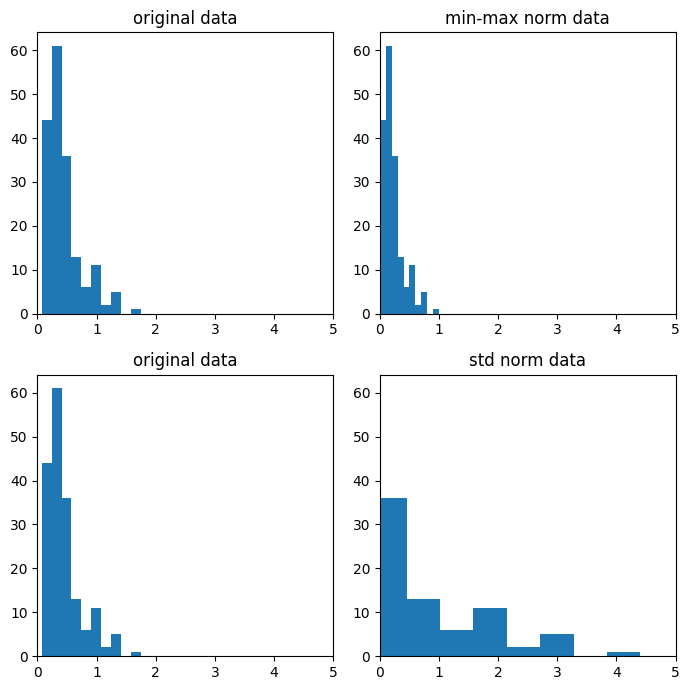

In [121]:
# plot b/f, a/f dist and the diff norm mathods
# select a specific freq
fig, ax = plt.subplots(2,2,figsize=(7,7))

ax[0,0].set_title("original data")
ax[0,0].set_xlim([0,5])
ax[0,0].hist(tryData[:,0])

ax[0,1].set_title("min-max norm data")
ax[0,1].set_xlim([0,5])
ax[0,1].hist(tryDataMinMaxNorm[:,0])

ax[1,0].set_title("original data")
ax[1,0].set_xlim([0,5])
ax[1,0].hist(tryData[:,0])

ax[1,1].set_title("std norm data")
ax[1,1].set_xlim([0,5])
ax[1,1].hist(tryDataStdNorm[:,0])

plt.tight_layout()
plt.show()

## CCA
* difference b/w two different datasets

## Model optimization

In [18]:
X_cca = sp.io.loadmat("datas/X_cca.mat")['X_cca'] # 180*8
Y = sp.io.loadmat("datas/Y.mat")['Y'] # 1*180
Y = Y.squeeze()

In [19]:
print(X_cca.shape, Y.shape)

(180, 8) (180,)


In [20]:
# find the optimized k (try range)
k_values = np.array(range(3,30))
all_acc = []

In [21]:
len(k_values)

27

In [22]:
Y_pred_all = []
for k_index in range(len(k_values)):
  k = k_values[k_index]

  # initialize variables to store all the predicted labels
  Y_pred_all = []

  # implement LTO (Leave-one Trial Out)
  for i in range(0, len(X_cca)):
    # be careful to the dimension here
    X_train = np.concatenate((X_cca[:i, :], X_cca[i+1:, :]), axis=0)
    Y_train = np.concatenate((Y[:i], Y[i+1:]), axis=0)
    X_test = X_cca[i, :]
    Y_test = Y[i]

    # combine all the pred
    # leave one trial to test
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, Y_train)
    Y_pred = knn_model.predict(X_test.reshape(1, X_test.shape[0]))
    Y_pred_all.append(Y_pred[0])

  # compute overall accuracy
  overall_acc = accuracy_score(Y, Y_pred_all)
  all_acc.append(overall_acc)

In [23]:
len(all_acc)

27

In [24]:
all_acc

[0.6055555555555555,
 0.6055555555555555,
 0.6388888888888888,
 0.6555555555555556,
 0.6333333333333333,
 0.6277777777777778,
 0.6555555555555556,
 0.6444444444444445,
 0.6111111111111112,
 0.6166666666666667,
 0.6388888888888888,
 0.6222222222222222,
 0.6388888888888888,
 0.6388888888888888,
 0.6555555555555556,
 0.6611111111111111,
 0.6333333333333333,
 0.6277777777777778,
 0.6388888888888888,
 0.6222222222222222,
 0.6055555555555555,
 0.6,
 0.5944444444444444,
 0.6055555555555555,
 0.6,
 0.6055555555555555,
 0.6055555555555555]

The best k is 15, and the acc is 0.6611111111111111




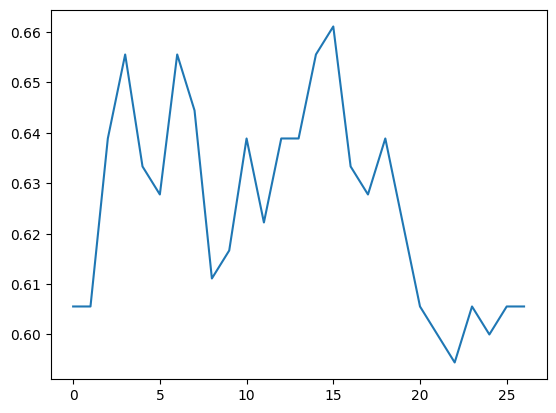

In [25]:
plt.plot(all_acc)
print(f"The best k is {all_acc.index(max(all_acc))}, and the acc is {max(all_acc)}\n\n")

# ML-3 Train a Model

In [26]:
from sklearn import svm

## Loading data

In [27]:
Y = sp.io.loadmat("datas/S7_data/y.mat")['y']
Y = Y.squeeze()

totalFreqTypes = np.array(list(set(Y)))

In [28]:
# choose desired data
X_ccaOz = sp.io.loadmat("datas/S7_data/ccaOz.mat")['ccaOz'] # CCA correlation
X_POz_FT = sp.io.loadmat("datas/S7_data/POz_FT.mat")['P29_all']

In [29]:
# cca: trials * freq correlation
# PSD power: timePoints * trials
# Spectral: trials *
print(Y.shape)
print(X_ccaOz.shape, X_POz_FT.shape)

(179,)
(179, 8) (179, 25)


## Split training and testing data

In [30]:
# 80% train 20% test
X_ccaOz_train, X_ccaOz_test, y_ccaOz_train, y_ccaOz_test = train_test_split(X_ccaOz, Y, test_size=0.2, random_state=42)

In [31]:
X_ccaOz_train.shape

(143, 8)

## Model initializetion

In [32]:
# Create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')

# KNN


## Training

In [33]:
# Train the model using the training data
clf.fit(X_ccaOz_train, y_ccaOz_train)

SVC(kernel='linear')

## Predict

In [34]:
# Make predictions on the test data
y_ccaOz_pred = clf.predict(X_ccaOz_test)

## Evaluation

In [35]:
import seaborn as sns

### CCA OZ

In [36]:
print(X_ccaOz_test.shape, y_ccaOz_pred.shape)

(36, 8) (36,)


#### Use TSNE to reduce the dimension and plot to unsupervised classified
* To check if my feature selection is OK before training.
* If the feature selection is good, then it will be separated into distinct groups.

In [37]:
from sklearn.manifold import TSNE # for dimension reduction

In [38]:
# Choose the number of dimensions for visualization (e.g., 2)
n_components = 2

tsne = TSNE(n_components=n_components)
X_ccaOz_tsne = tsne.fit_transform(X_ccaOz)

In [39]:
X_ccaOz_tsne.shape

(179, 2)

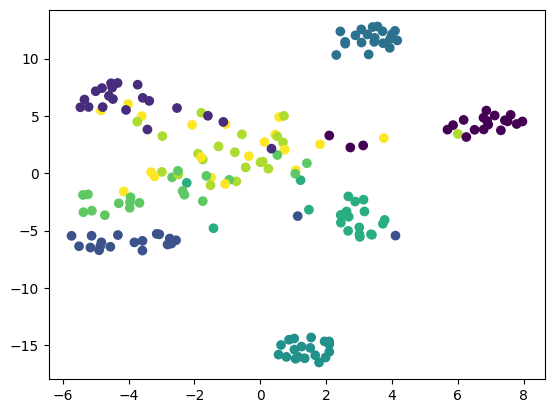

In [40]:
plt.scatter(X_ccaOz_tsne[:, 0], X_ccaOz_tsne[:, 1], c=Y)

#### Metrics and draw graph

Accuracy: 0.61
Recall: 0.61
Precision: 0.60
Confusion Matrix:
[[2 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0]
 [0 0 2 0 0 1 0 0 0]
 [0 0 0 5 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0]
 [0 0 1 0 0 2 0 1 0]
 [0 0 0 0 0 0 3 2 0]
 [0 1 0 0 0 0 0 4 0]
 [1 0 0 0 0 0 0 6 0]]


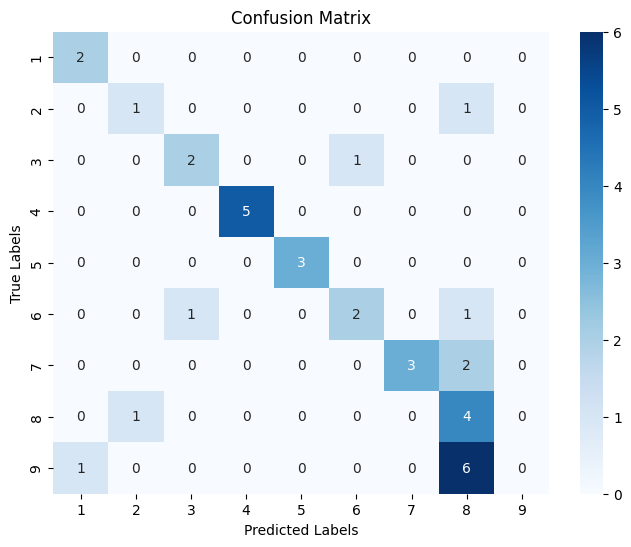

In [41]:
# accuracy
accuracy = accuracy_score(y_ccaOz_test, y_ccaOz_pred)
print(f"Accuracy: {accuracy:.2f}")

# recall
recall = recall_score(y_ccaOz_test, y_ccaOz_pred, average='weighted')  # You can change the average parameter if needed
print(f"Recall: {recall:.2f}")

# precision
precision = precision_score(y_ccaOz_test, y_ccaOz_pred, average='weighted', zero_division=0)  # You can change the average parameter if needed
print(f"Precision: {precision:.2f}")

# Confusion matrix
cm = confusion_matrix(y_ccaOz_test, y_ccaOz_pred)
print("Confusion Matrix:")
print(cm)

# Get class labels
class_labels = np.unique(np.concatenate((y_ccaOz_test, y_ccaOz_pred)))

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Comparison result
* different ML models (SVM, KNN)
* different features (CCA, power)
* different channels (O1, Oz, O2)

---

1. 比較不同模型 (SVM, KNN)
  * CCA
  * Oz
2. 比較不同Feature (CCA, power)
  * KNN
  * Oz
3. 比較多個Channels (Oz, O1+Oz+O2)
  * KNN
  * power

<table>
  <thead>
    <tr>
      <th>比較基準</th>
      <th>model</th>
      <th>dataset</th>
      <th>channel</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>ML model</td>
      <td>SVM & KNN</td>
      <td>CCA</td>
      <td>Oz</td>
    </tr>
    <tr>
      <td>Dataset</td>
      <td>KNN</td>
      <td>CCA & Power</td>
      <td>Oz</td>
    </tr>
    <tr>
      <td>Channel</td>
      <td>KNN</td>
      <td>CCA</td>
      <td>Oz & O1+Oz+O2 & O1, O2</td>
    </tr>
  </tbody>
</table>



## Data Preparation

In [42]:
Y = sp.io.loadmat("datas/S7_data/y.mat")['y']
Y = Y.squeeze()
print(Y.shape)

totalFreqTypes = np.array(list(set(Y)))

(179,)


In [43]:
# choose desired data
X_ccaO1 = sp.io.loadmat("datas/S7_data/ccaO1.mat")['ccaO1'] # O1 CCA (correlation b/w sine/cosine wave)
X_ccaOz = sp.io.loadmat("datas/S7_data/ccaOz.mat")['ccaOz'] # Oz CCA
X_ccaO2 = sp.io.loadmat("datas/S7_data/ccaO2.mat")['ccaO2'] # O2 CCA

X_PO1 = sp.io.loadmat("datas/S7_data/PO1_FT.mat")['P28_all'] # O1 Power
X_POz = sp.io.loadmat("datas/S7_data/POz_FT.mat")['P29_all'] # Oz Power
X_PO2 = sp.io.loadmat("datas/S7_data/PO2_FT.mat")['P30_all'] # O2 Power

In [44]:
# cca: trials * freq correlation
# PSD power: timePoints * trials
# Spectral: trials * freq -> power
print(Y.shape)
print(X_ccaOz.shape, X_PO1.shape, X_POz.shape, X_PO2.shape)

(179,)
(179, 8) (179, 25) (179, 25) (179, 25)


#### Optimize K

In [45]:
y_k_pred_all = []
all_k_acc = []
for k_index in range(len(k_values)):
  k = k_values[k_index]

  # initialize variables to store all the predicted labels
  y_k_pred_all = []

  # implement LTO (Leave-one Trial Out)
  for i in range(len(X_ccaOz)):
    # be careful to the dimension here
    X_train = np.concatenate((X_ccaOz[:i, :], X_ccaOz[i+1:, :]), axis=0)
    Y_train = np.concatenate((Y[:i], Y[i+1:]), axis=0)
    X_test = X_cca[i, :]
    Y_test = Y[i]

    # combine all the pred
    # leave one trial to test
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, Y_train)
    y_k_pred = knn_model.predict(X_test.reshape(1, X_test.shape[0]))
    y_k_pred_all.append(y_k_pred[0])

  # compute overall accuracy
  overall_acc = accuracy_score(Y, y_k_pred_all)
  all_k_acc.append(overall_acc)

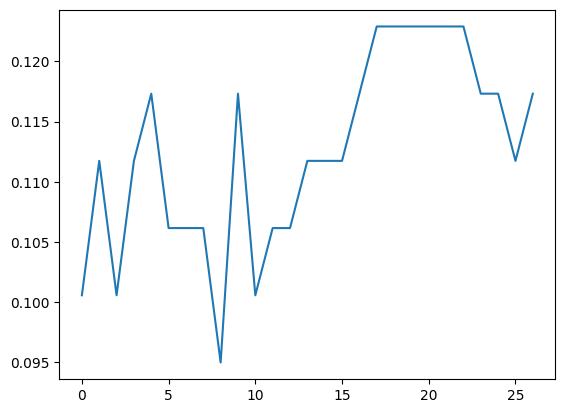

In [46]:
plt.plot(all_k_acc)

In [47]:
# setting KNN k
k_values = np.array(range(3,30))
k = 20 # optimization

## Data Exploration -> Use TSNE to reduce the dimension and plot to unsupervised classified
* 定性分析
* Data exploration
* To check if my feature selection is OK before training.
* If the feature selection is good, then it will be separated into distinct groups.

In [48]:
from sklearn.manifold import TSNE # for dimension reduction

In [49]:
# Choose the number of dimensions for visualization (e.g., 2)
n_components = 2

tsne = TSNE(n_components=n_components)
X_ccaO1_tsne = tsne.fit_transform(X_ccaO1)
X_ccaOz_tsne = tsne.fit_transform(X_ccaOz)
X_ccaO2_tsne = tsne.fit_transform(X_ccaO2)
X_PO1_tsne = tsne.fit_transform(X_PO1)
X_POz_tsne = tsne.fit_transform(X_POz)
X_PO2_tsne = tsne.fit_transform(X_PO2)

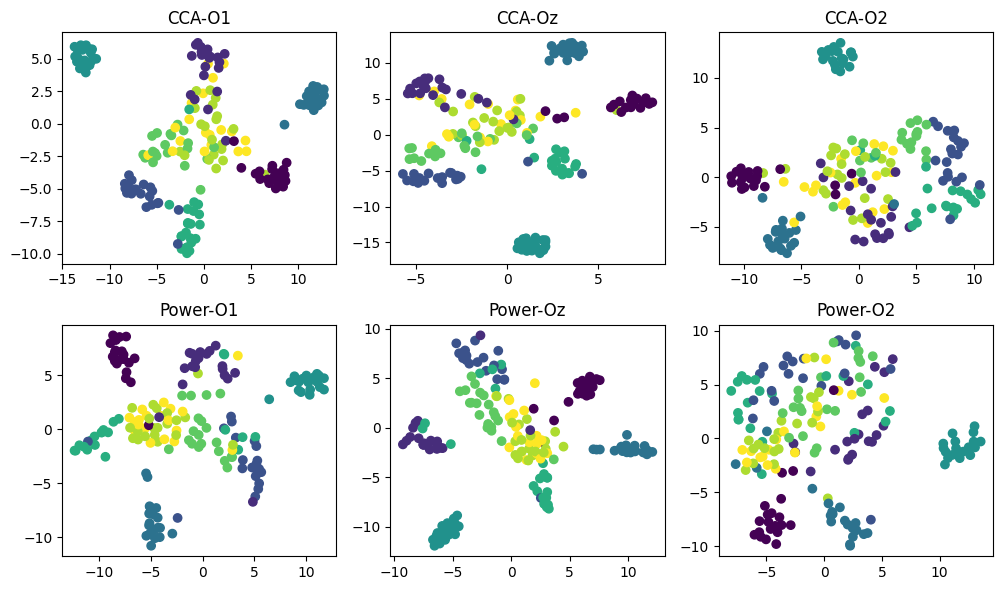

In [50]:
fig, ax = plt.subplots(2,3,figsize=(10,6))

ax[0,0].set_title("CCA-O1")
ax[0,0].scatter(X_ccaO1_tsne[:, 0], X_ccaO1_tsne[:, 1], c=Y)

ax[0,1].set_title("CCA-Oz")
ax[0,1].scatter(X_ccaOz_tsne[:, 0], X_ccaOz_tsne[:, 1], c=Y)

ax[0,2].set_title("CCA-O2")
ax[0,2].scatter(X_ccaO2_tsne[:, 0], X_ccaO2_tsne[:, 1], c=Y)

ax[1,0].set_title("Power-O1")
ax[1,0].scatter(X_PO1_tsne[:, 0], X_PO1_tsne[:, 1], c=Y)

ax[1,1].set_title("Power-Oz")
ax[1,1].scatter(X_POz_tsne[:, 0], X_POz_tsne[:, 1], c=Y)

ax[1,2].set_title("Power-O2")
ax[1,2].scatter(X_PO2_tsne[:, 0], X_PO2_tsne[:, 1], c=Y)

plt.tight_layout()
plt.show()

## Performance between different models (SVM, KNN)

### Split training and testing data (optional)

In [51]:
# 80% train 20% test
X_ccaOz_train, X_ccaOz_test, y_ccaOz_train, y_ccaOz_test = train_test_split(X_ccaOz, Y, test_size=0.2, random_state=42)

In [52]:
X_ccaOz_train.shape

(143, 8)

### Model initializetion (optional(if use 80-20 split))

In [53]:
# Create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')

# KNN
k = len(totalFreqTypes)
knn = KNeighborsClassifier(n_neighbors=k)

### Training (CV-LTO)

In [54]:
# Train the model using the training data
# cross-validdation leave-one trial out
y_svm_pred_all = []
y_knn_pred_all = []

for i in range(len(X_ccaOz)):
  x_train = np.concatenate((X_ccaOz[:i, :], X_ccaOz[i+1:, :]), axis=0)
  y_train = np.concatenate((Y[:i], Y[i+1:]), axis=0)
  x_test = X_ccaOz[i]
  y_test = Y[i]

  # initialize models
  clf = svm.SVC(kernel='linear')
  knn = KNeighborsClassifier(n_neighbors=k)

  # training
  clf.fit(x_train, y_train)
  knn.fit(x_train, y_train)

  # predict
  y_svm_pred = clf.predict(np.transpose(x_test.reshape(x_test.shape[0], 1)))
  y_knn_pred = knn.predict(np.transpose(x_test.reshape(x_test.shape[0], 1)))

  y_svm_pred_all.append(y_svm_pred)
  y_knn_pred_all.append(y_knn_pred)

In [55]:
y_svm_pred_all = np.array(y_svm_pred_all).squeeze()
y_knn_pred_all = np.array(y_knn_pred_all).squeeze()

In [56]:
y_k_pred_all = []
all_k_acc = []
for k_index in range(len(k_values)):
  k = k_values[k_index]

  # initialize variables to store all the predicted labels
  y_k_pred_all = []

  # implement LTO (Leave-one Trial Out)
  for i in range(len(X_ccaOz)):
    # be careful to the dimension here
    X_train = np.concatenate((X_ccaOz[:i, :], X_ccaOz[i+1:, :]), axis=0)
    Y_train = np.concatenate((Y[:i], Y[i+1:]), axis=0)
    X_test = X_cca[i, :]
    Y_test = Y[i]

    # combine all the pred
    # leave one trial to test
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, Y_train)
    y_k_pred = knn_model.predict(X_test.reshape(1, X_test.shape[0]))
    y_k_pred_all.append(y_k_pred[0])

  # compute overall accuracy
  overall_acc = accuracy_score(Y, y_k_pred_all)
  all_k_acc.append(overall_acc)

### Predict (optional)

In [57]:
# Make predictions on the test data
y_svm_ccaOz_pred = clf.predict(X_ccaOz_test)
y_knn_ccaOz_pred = knn.predict(X_ccaOz_test)

### Evaluation
* 定量分析

In [58]:
import seaborn as sns

SVM Accuracy: 0.73
KNN Accuracy: 0.75

SVN Recall: 0.73
KNN Recall: 0.75

SVM Precision: 0.73
KNN Precision: 0.71

SVM Confusion Matrix:
[[17  0  0  0  0  0  0  3  0]
 [ 0 16  0  0  0  0  0  4  0]
 [ 0  0 18  0  0  2  0  0  0]
 [ 0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0]
 [ 0  0  0  0  0 16  1  4  0]
 [ 0  0  0  0  0  0 11  9  0]
 [ 1  1  0  0  0  0  4 13  1]
 [ 0  3  0  0  0  0  1 15  0]]


KNN Confusion Matrix:
[[17  0  0  0  0  0  0  0  3]
 [ 0 17  0  0  0  0  0  2  1]
 [ 0  0 18  0  0  2  0  0  0]
 [ 0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0]
 [ 0  0  1  0  0 19  1  0  0]
 [ 0  0  0  0  0  0 15  4  1]
 [ 1  2  0  0  0  0  6  9  2]
 [ 2  5  0  0  0  0  3  9  0]]




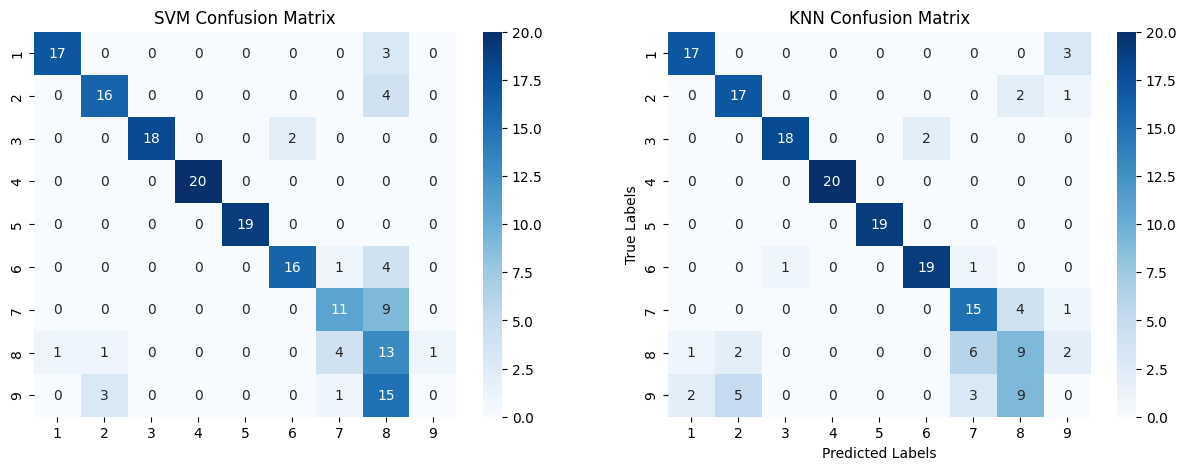

In [59]:
# accuracy (overall)
svm_acc = accuracy_score(Y, y_svm_pred_all)
knn_acc = accuracy_score(Y, y_knn_pred_all)
print(f"SVM Accuracy: {svm_acc:.2f}")
print(f"KNN Accuracy: {knn_acc:.2f}\n")

# recall
svm_recall = recall_score(Y, y_svm_pred_all, average='weighted')
knn_recall = recall_score(Y, y_knn_pred_all, average='weighted')
print(f"SVN Recall: {svm_recall:.2f}")
print(f"KNN Recall: {knn_recall:.2f}\n")

# precision
svm_precision = precision_score(Y, y_svm_pred_all, average='weighted', zero_division=0)
knn_precision = precision_score(Y, y_knn_pred_all, average='weighted', zero_division=0)
print(f"SVM Precision: {svm_precision:.2f}")
print(f"KNN Precision: {knn_precision:.2f}\n")

# Confusion matrix
svm_cm = confusion_matrix(Y, y_svm_pred_all)
knn_cm = confusion_matrix(Y, y_knn_pred_all)
print("SVM Confusion Matrix:")
print(svm_cm)
print("\n")

print("KNN Confusion Matrix:")
print(knn_cm)
print("\n")

# Create a heatmap for visualization
fig, ax = plt.subplots(1,2, figsize=(15,5))

# Get class labels
svm_class_labels = totalFreqTypes
knn_class_labels = totalFreqTypes

ax[0].set_title("SVM Confusion Matrix")
sns.heatmap(svm_cm, ax=ax[0], annot=True, fmt="d", cmap="Blues", xticklabels=svm_class_labels, yticklabels=svm_class_labels)

ax[1].set_title("KNN Confusion Matrix")
sns.heatmap(knn_cm, ax=ax[1], annot=True, fmt="d", cmap="Blues", xticklabels=knn_class_labels, yticklabels=knn_class_labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Difference between different features (CCA, Power)
1. use CCA to classification
2. use power (feature: freq, power) to classification (flickers freq)

In [60]:
X_POz = scaler.fit_transform(X_POz) # standard normalize

### Training model

In [61]:
y_pred_cca_all = []
y_pred_poz_all = []

for i in range(len(X_ccaOz)):
  x_train = np.concatenate((X_ccaOz[:i, :], X_ccaOz[i+1:, :]), axis=0)
  y_train = np.concatenate((Y[:i], Y[i+1:]), axis=0)
  x_test = X_ccaOz[i]
  y_test = Y[i]

  # initialize models
  knn = KNeighborsClassifier(n_neighbors=k)

  # training
  knn.fit(x_train, y_train)

  # predict
  y_pred = knn.predict(np.transpose(x_test.reshape(x_test.shape[0], 1)))
  y_pred_cca_all.append(y_pred)

for i in range(len(X_POz)):
  x_train = np.concatenate((X_POz[:i, :], X_POz[i+1:, :]), axis=0)
  y_train = np.concatenate((Y[:i], Y[i+1:]), axis=0)
  x_test = X_POz[i]
  y_test = Y[i]

  # initialize models
  knn = KNeighborsClassifier(n_neighbors=k)

  # training
  knn.fit(x_train, y_train)

  # predict
  y_pred = knn.predict(np.transpose(x_test.reshape(x_test.shape[0], 1)))
  y_pred_poz_all.append(y_pred)

### Evaluation

CCA Accuracy: 0.77
POz Accuracy: 0.69

CCA Recall: 0.77
POz Recall: 0.69

CCA Precision: 0.77
POz Precision: 0.75

CCA Confusion Matrix:
[[17  0  0  0  0  0  0  1  2]
 [ 0 16  0  0  0  0  0  3  1]
 [ 0  0 18  0  0  2  0  0  0]
 [ 0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0]
 [ 0  0  1  0  0 18  1  1  0]
 [ 0  0  0  0  0  0 14  4  2]
 [ 1  1  0  0  0  0  2 12  4]
 [ 1  3  0  0  0  0  4  8  3]]


POz Confusion Matrix:
[[16  0  0  0  0  0  0  3  1]
 [ 0 16  0  0  0  0  0  2  2]
 [ 0  0 17  0  0  3  0  0  0]
 [ 0  0  0 17  0  0  0  2  1]
 [ 0  0  0  0 17  0  0  2  0]
 [ 0  1  4  0  0 10  0  6  0]
 [ 0  0  0  0  1  0 17  2  0]
 [ 0  0  0  0  0  0  0 12  8]
 [ 0  0  0  0  0  0  1 17  1]]




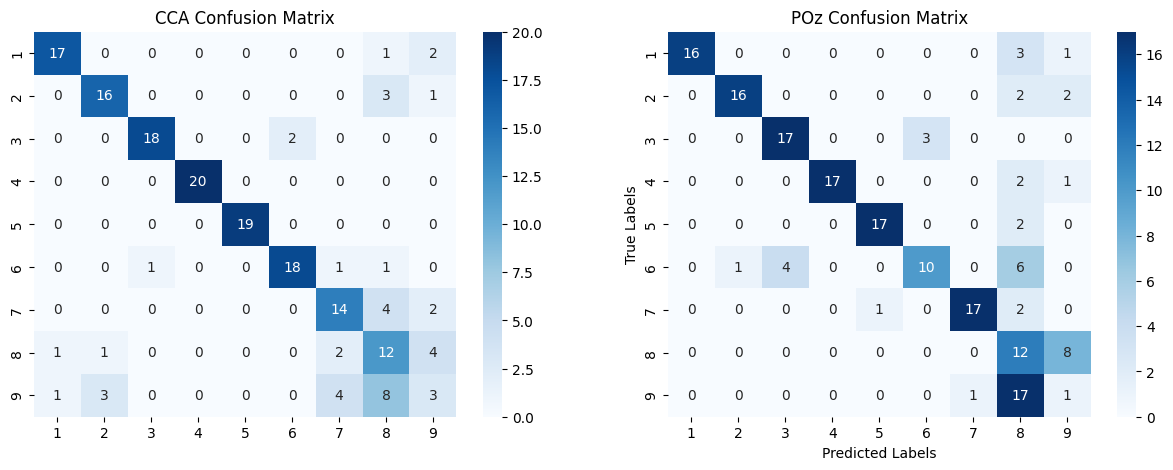

In [84]:
# accuracy (overall)
cca_acc = accuracy_score(Y, y_pred_cca_all)
poz_acc = accuracy_score(Y, y_pred_poz_all)
print(f"CCA Accuracy: {cca_acc:.2f}")
print(f"POz Accuracy: {poz_acc:.2f}\n")

# recall
cca_recall = recall_score(Y, y_pred_cca_all, average='weighted')
poz_recall = recall_score(Y, y_pred_poz_all, average='weighted')
print(f"CCA Recall: {cca_recall:.2f}")
print(f"POz Recall: {poz_recall:.2f}\n")

# precision
cca_precision = precision_score(Y, y_pred_cca_all, average='weighted', zero_division=0)
poz_precision = precision_score(Y, y_pred_poz_all, average='weighted', zero_division=0)
print(f"CCA Precision: {cca_precision:.2f}")
print(f"POz Precision: {poz_precision:.2f}\n")

# Confusion matrix
cca_cm = confusion_matrix(Y, y_pred_cca_all)
poz_cm = confusion_matrix(Y, y_pred_poz_all)
print("CCA Confusion Matrix:")
print(cca_cm)
print("\n")

print("POz Confusion Matrix:")
print(poz_cm)
print("\n")

# Create a heatmap for visualization
fig, ax = plt.subplots(1,2, figsize=(15,5))

# Get class labels
class_labels = totalFreqTypes

ax[0].set_title("CCA Confusion Matrix")
sns.heatmap(cca_cm, ax=ax[0], annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

ax[1].set_title("POz Confusion Matrix")
sns.heatmap(poz_cm, ax=ax[1], annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

## Diffrence between channels (Oz, O1+Oz+O2)

### Combining data

In [76]:
X_ccaO1OzO2 = np.concatenate((X_ccaO1, X_ccaOz, X_ccaO2), axis = 0)

In [78]:
print(X_ccaO1OzO2.shape, X_ccaO1OzO2.shape)

(537, 8) (537, 8)


### Training model

In [79]:
rY = Y.repeat(3)

In [87]:
y_pred_oz_all = []
y_pred_o1to2_all = []
y_pred_o1_all = []
y_pred_o2_all = []

for i in range(len(X_ccaOz)):
  x_train = np.concatenate((X_ccaOz[:i, :], X_ccaOz[i+1:, :]), axis=0)
  y_train = np.concatenate((Y[:i], Y[i+1:]), axis=0)
  x_test = X_ccaOz[i]
  y_test = Y[i]

  # initialize models
  knn = KNeighborsClassifier(n_neighbors=k)

  # training
  knn.fit(x_train, y_train)

  # predict
  y_pred = knn.predict(np.transpose(x_test.reshape(x_test.shape[0], 1)))
  y_pred_oz_all.append(y_pred)

for i in range(len(X_ccaO1OzO2)):
  x_train = np.concatenate((X_ccaO1OzO2[:i, :], X_ccaO1OzO2[i+1:, :]), axis=0)
  y_train = np.concatenate((rY[:i], rY[i+1:]), axis=0)
  x_test = X_ccaO1OzO2[i]
  y_test = rY[i]

  # initialize models
  knn = KNeighborsClassifier(n_neighbors=k)

  # training
  knn.fit(x_train, y_train)

  # predict
  y_pred = knn.predict(np.transpose(x_test.reshape(x_test.shape[0], 1)))
  y_pred_o1to2_all.append(y_pred)

# O1
for i in range(len(X_ccaO1)):
  x_train = np.concatenate((X_ccaO1[:i, :], X_ccaO1[i+1:, :]), axis=0)
  y_train = np.concatenate((Y[:i], Y[i+1:]), axis=0)
  x_test = X_ccaO1[i]
  y_test = Y[i]

  # initialize models
  knn = KNeighborsClassifier(n_neighbors=k)

  # training
  knn.fit(x_train, y_train)

  # predict
  y_pred = knn.predict(np.transpose(x_test.reshape(x_test.shape[0], 1)))
  y_pred_o1_all.append(y_pred)

# O2
for i in range(len(X_ccaO2)):
  x_train = np.concatenate((X_ccaO2[:i, :], X_ccaO2[i+1:, :]), axis=0)
  y_train = np.concatenate((Y[:i], Y[i+1:]), axis=0)
  x_test = X_ccaO2[i]
  y_test = Y[i]

  # initialize models
  knn = KNeighborsClassifier(n_neighbors=k)

  # training
  knn.fit(x_train, y_train)

  # predict
  y_pred = knn.predict(np.transpose(x_test.reshape(x_test.shape[0], 1)))
  y_pred_o2_all.append(y_pred)

### Evaluation

O1 Accuracy: 0.79
Oz Accuracy: 0.77
O2 Accuracy: 0.69
O1+Oz+O2 Accuracy: 0.09

O1 Recall: 0.79
Oz Recall: 0.77
O2 Recall: 0.69
O1+Oz+O2 Recall: 0.09

O1 Precision: 0.79
Oz Precision: 0.77
O2 Precision: 0.70
O1+Oz+O2 Precision: 0.07

O1 Confusion Matrix:
[[18  0  0  0  0  0  0  0  2]
 [ 0 16  0  0  0  0  0  3  1]
 [ 0  0 17  0  0  3  0  0  0]
 [ 0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0]
 [ 0  0  1  0  0 19  0  1  0]
 [ 0  0  0  0  0  0 16  3  1]
 [ 1  1  0  0  0  0  2 14  2]
 [ 0  4  0  0  0  0  4  8  3]]


Oz Confusion Matrix:
[[17  0  0  0  0  0  0  1  2]
 [ 0 16  0  0  0  0  0  3  1]
 [ 0  0 18  0  0  2  0  0  0]
 [ 0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0]
 [ 0  0  1  0  0 18  1  1  0]
 [ 0  0  0  0  0  0 14  4  2]
 [ 1  1  0  0  0  0  2 12  4]
 [ 1  3  0  0  0  0  4  8  3]]


O2 Confusion Matrix:
[[17  0  0  0  0  0  0  3  0]
 [ 0 13  0  0  0  0  1  6  0]
 [ 0  0 12  0  0  6  2  0  0]
 [ 1  1  0 18  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0]
 [ 0  2 

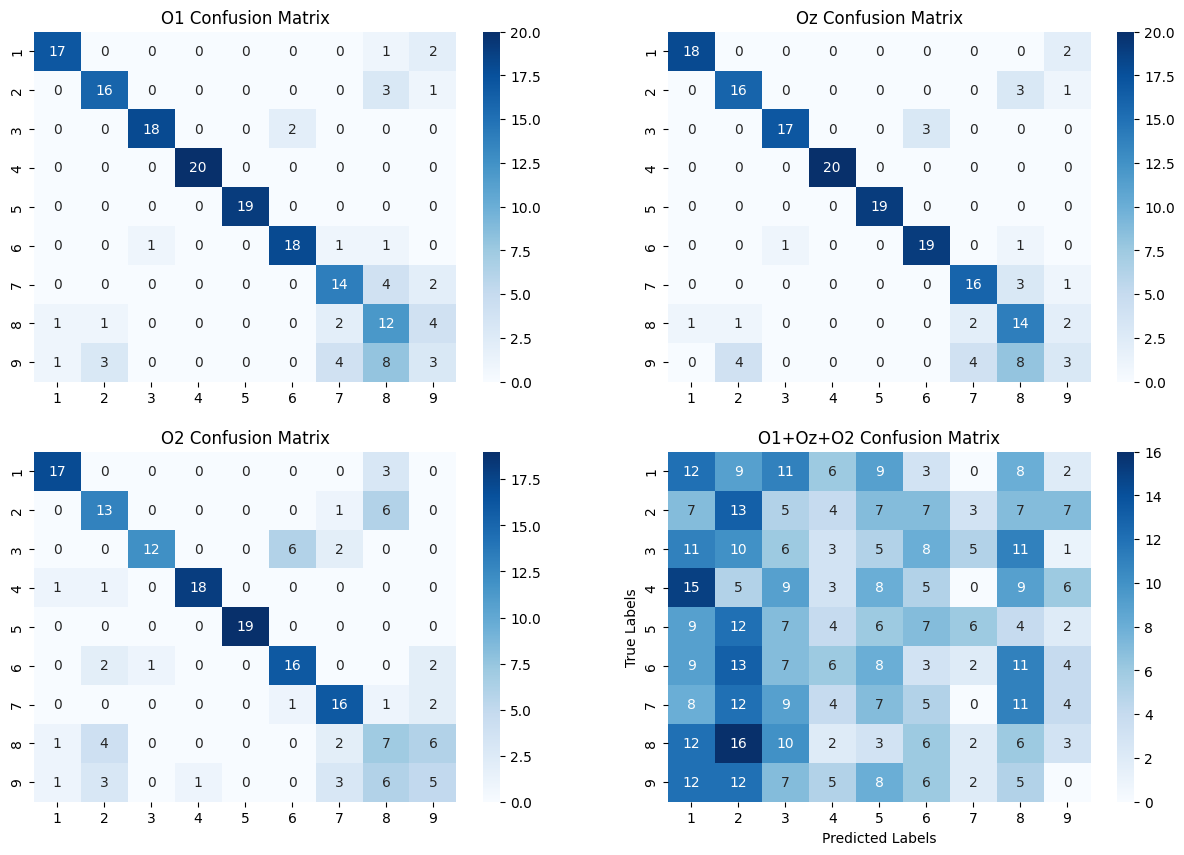

In [90]:
# accuracy (overall)
o1_acc = accuracy_score(Y, y_pred_o1_all)
oz_acc = accuracy_score(Y, y_pred_oz_all)
o2_acc = accuracy_score(Y, y_pred_o2_all)
o1too2_acc = accuracy_score(rY, y_pred_o1to2_all)
print(f"O1 Accuracy: {o1_acc:.2f}")
print(f"Oz Accuracy: {oz_acc:.2f}")
print(f"O2 Accuracy: {o2_acc:.2f}")
print(f"O1+Oz+O2 Accuracy: {o1too2_acc:.2f}\n")

# # recall
o1_recall = recall_score(Y, y_pred_o1_all, average='weighted')
oz_recall = recall_score(Y, y_pred_oz_all, average='weighted')
o2_recall = recall_score(Y, y_pred_o2_all, average='weighted')
o1too2_recall = recall_score(rY, y_pred_o1to2_all, average='weighted')
print(f"O1 Recall: {o1_recall:.2f}")
print(f"Oz Recall: {oz_recall:.2f}")
print(f"O2 Recall: {o2_recall:.2f}")
print(f"O1+Oz+O2 Recall: {o1too2_recall:.2f}\n")

# # precision
o1_precision = precision_score(Y, y_pred_o1_all, average='weighted', zero_division=0)
oz_precision = precision_score(Y, y_pred_oz_all, average='weighted', zero_division=0)
o2_precision = precision_score(Y, y_pred_o2_all, average='weighted', zero_division=0)
o1too2_precision = precision_score(rY, y_pred_o1to2_all, average='weighted', zero_division=0)
print(f"O1 Precision: {o1_precision:.2f}")
print(f"Oz Precision: {oz_precision:.2f}")
print(f"O2 Precision: {o2_precision:.2f}")
print(f"O1+Oz+O2 Precision: {o1too2_precision:.2f}\n")

# # Confusion matrix
o1_cm = confusion_matrix(Y, y_pred_o1_all)
oz_cm = confusion_matrix(Y, y_pred_oz_all)
o2_cm = confusion_matrix(Y, y_pred_o2_all)
o1too2_cm = confusion_matrix(rY, y_pred_o1to2_all)
print("O1 Confusion Matrix:")
print(o1_cm)
print("\n")

print("Oz Confusion Matrix:")
print(oz_cm)
print("\n")

print("O2 Confusion Matrix:")
print(o2_cm)
print("\n")

print("O1+Oz+O2 Confusion Matrix:")
print(o1too2_cm)
print("\n")

# Create a heatmap for visualization
fig, ax = plt.subplots(2,2, figsize=(15,10))

# Get class labels
class_labels = totalFreqTypes

ax[0, 0].set_title("O1 Confusion Matrix")
sns.heatmap(o1_cm, ax=ax[0,1], annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
ax[0, 1].set_title("Oz Confusion Matrix")
sns.heatmap(oz_cm, ax=ax[0,0], annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
ax[1, 0].set_title("O2 Confusion Matrix")
sns.heatmap(o2_cm, ax=ax[1,0], annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
ax[1,1].set_title("O1+Oz+O2 Confusion Matrix")
sns.heatmap(o1too2_cm, ax=ax[1,1], annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Reference
* [ML訓練過程](https://ithelp.ithome.com.tw/articles/10222697)